In [1]:
'''Set up White Mesa Plant'''
from cortix import Cortix
from cortix import Network
from cortix import Units as unit
white_mesa = Cortix(use_mpi=False, splash=True)
wm_net = white_mesa.network = Network()

[5864] 2024-12-09 17:21:43,147 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%8

In [2]:
'''Setup Precipitation'''
import src.precipitation
precip = src.precipitation.Precipitation()
wm_net.module(precip)

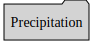

In [3]:
'''Setup Network'''
wm_net.draw(engine='dot', node_shape='folder', size='600,1200')

In [4]:
'''Initialize run'''
end_time = 10*unit.day
time_step = 1*unit.hour
show_time = (True, unit.hour)

for m in wm_net.modules:
    m.end_time = end_time
    m.time_step = time_step
    m.show_time = show_time

In [5]:
'''Run Whire Mesa and shutdown'''
white_mesa.run()
white_mesa.close()

[5864] 2024-12-09 17:21:46,128 - cortix - INFO - Launching Module <src.precipitation.Precipitation object at 0x000001A497F4F8F0>
[5864] 2024-12-09 17:21:49,250 - cortix - INFO - run()::Elapsed wall clock time [s]: 6.1
[5864] 2024-12-09 17:21:49,251 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8

In [6]:
'''Recover modules data'''
precip = wm_net.modules[0]

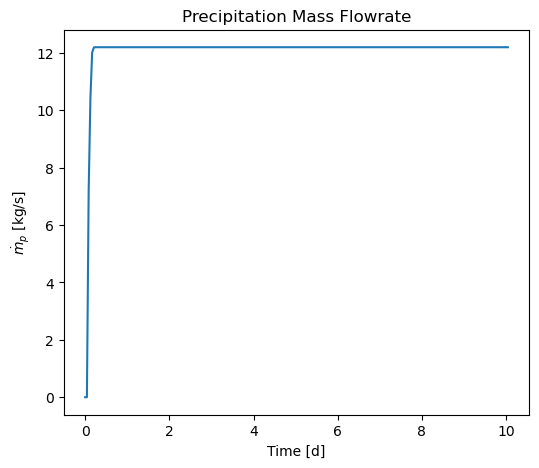

In [7]:
'''precipitation and plot'''
import matplotlib.pyplot as plt
(quant, time_unit) = precip.precipitation_phase.get_quantity_history('mass-flowrate')
quant.plot(x_scaling=1/unit.day, x_label='Time [d]',y_label=quant.latex_name+' ['+quant.unit+']')
plt.grid()